In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../..

!hostname

/p/fastdata/pli/Private/oberstrass1/datasets/vervet1818-3d
jrlogin10.jureca


In [2]:
cortex_file = "data/aa/volume/brain_visa/cortex_6.nii"

WM = 200

###

from pli.data.functions import read_nifti
import numpy as np

cortex_volume, cortex_affine = read_nifti(cortex_file)
wm_volume = cortex_volume == WM

cortex_volume.shape, cortex_affine

((448, 243, 485),
 array([[0.0843776, 0.       , 0.       , 0.       ],
        [0.       , 0.06     , 0.       , 0.       ],
        [0.       , 0.       , 0.0843776, 0.       ],
        [0.       , 0.       , 0.       , 1.       ]]))

In [3]:
# Compute WM distance

from scipy.ndimage import distance_transform_edt

spacing = np.diag(cortex_affine)[:3]
distance_map = distance_transform_edt(wm_volume, sampling=spacing)
distance_map = distance_map.astype(np.float32)

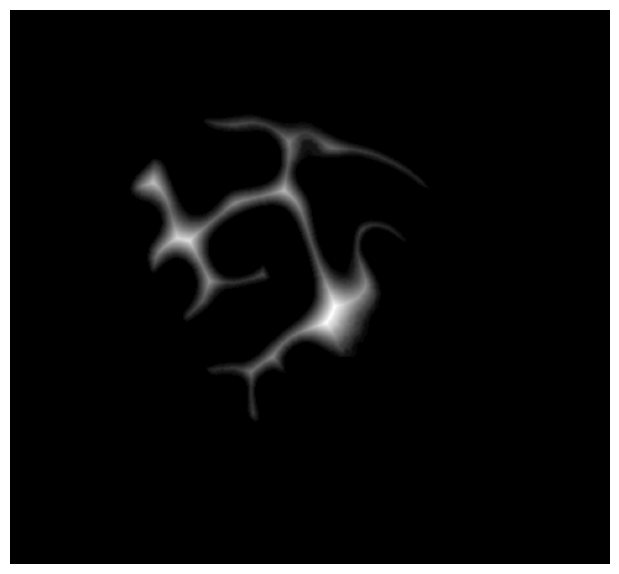

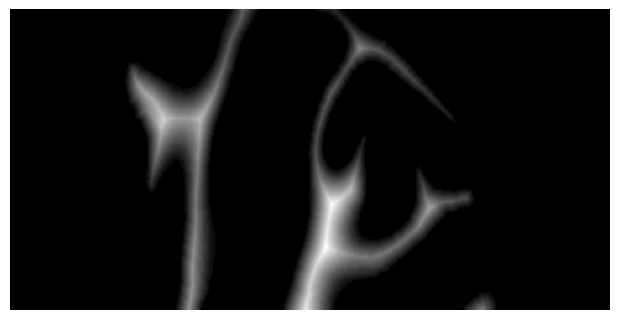

In [4]:
import pli.image as im

im.show(distance_map[:, 120, :])
im.show(distance_map[200, :, :])

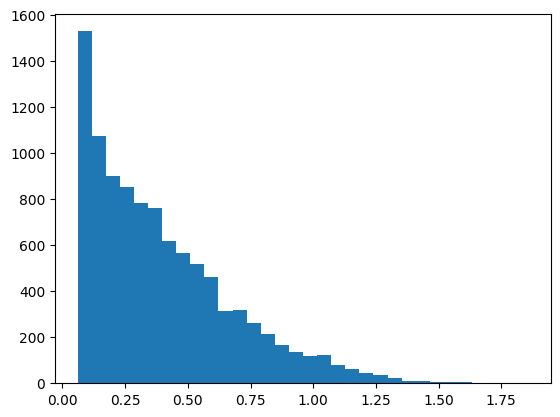

In [5]:
import matplotlib.pyplot as plt

plt.hist(np.random.choice(distance_map[wm_volume].flatten(), 10_000), bins=32);

In [7]:
distance_file = "data/aa/volume/cortex/wm_depth_6.nii"

###

from pli.data.functions import write_nifti

write_nifti(distance_file, distance_map[::-1, : ,:], cortex_affine) #, gzip=True)

Use dtype float32
